This is a showcase of implementing a linear regression model for [boston housing prices](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices).

Much of what I've learned and applied in this notebook comes from Andrew NG's machine learning specialization course and other things like analyzing the importance of variables for the model I've learned while studying statistics and data processing in University.

While there are fully ready libraries to create linear regression models fast and easy, this project is meant to showcase understanding of machine learning concepts and how such libraries potentially work.

In [111]:
# Import libraries
import copy, math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

In [4]:
#Read data from file
cols = ['CRIM', # per capita crime rate by town
           'ZN', # proportion of residential land zoned for lots over 25,000 sq.ft.
           'INDUS', # proportion of non-retail business acres per town
           'CHAS', # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
           'NOX', # nitric oxides concentration (parts per 10 million)
           'RM', # average number of rooms per dwelling
           'AGE', # proportion of owner-occupied units built prior to 1940
           'DIS', # weighted distances to five Boston employment centres
           'RAD', # index of accessibility to radial highways
           'TAX', # full-value property-tax rate per $10,000
           'PTRATIO', # pupil-teacher ratio by town
           'B', # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
           'LSTAT', # % lower status of the population
           'MEDV'] # Median value of owner-occupied homes in $1000's
data=pd.read_csv('housing.csv', header=None, delim_whitespace=True)
data.columns = cols # Add columns into the data
data.head() # Print the first rows of data to see it was imported properly

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# Split the data into features and target sets
X = data.iloc[:, :-1] # All columns except last goes into X
y = data.iloc[:, -1] # Only select last column for y
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


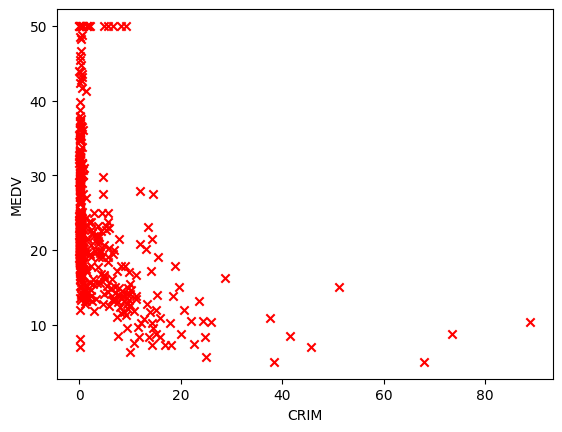

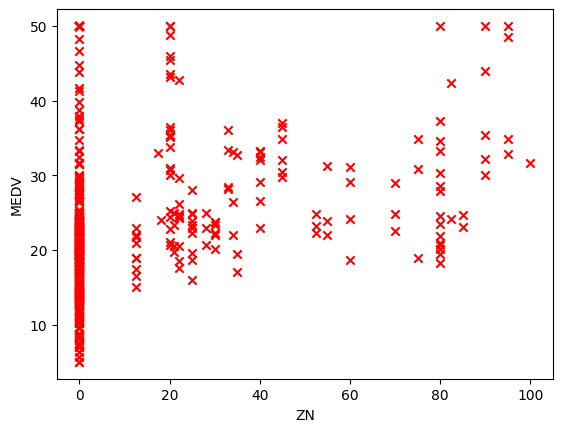

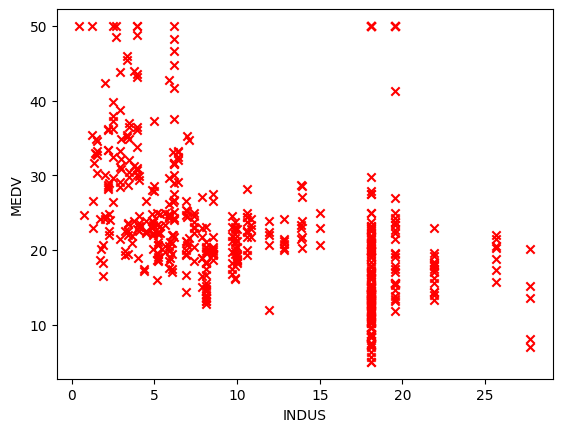

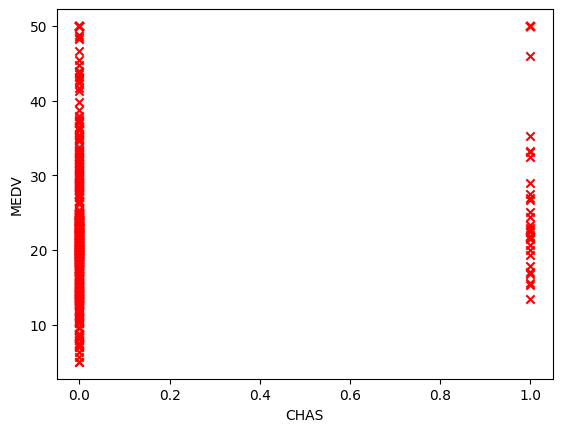

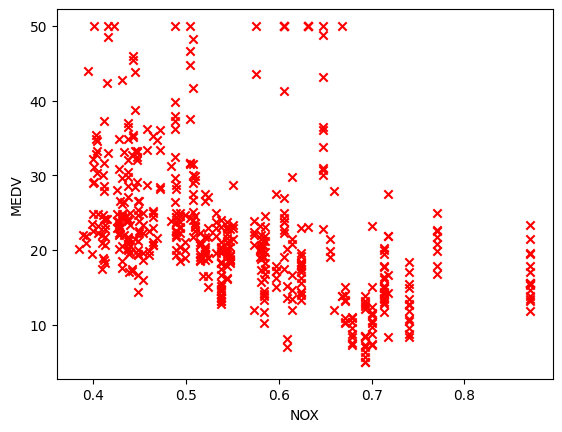

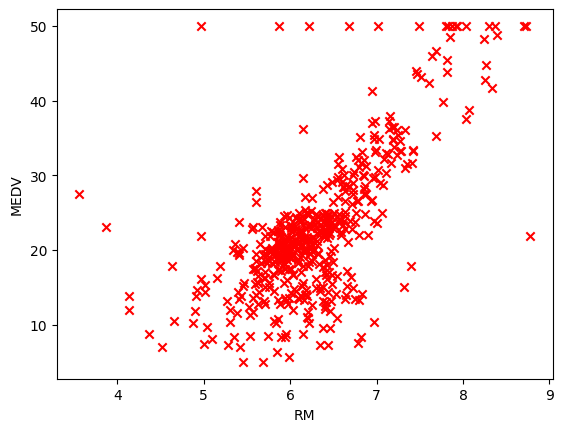

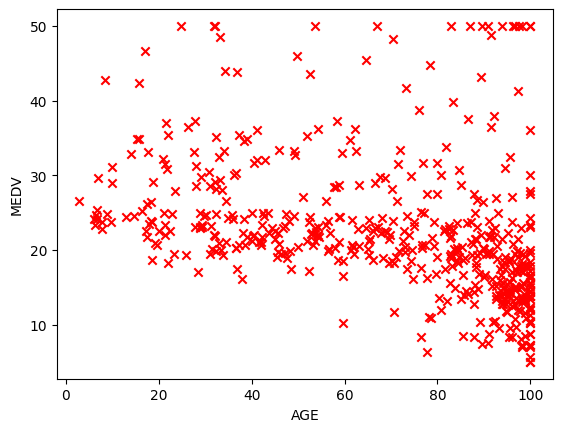

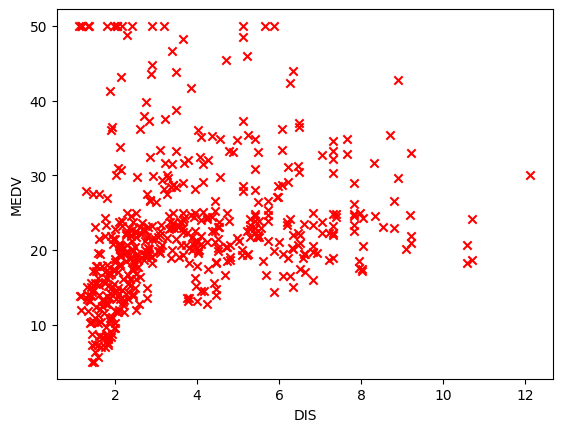

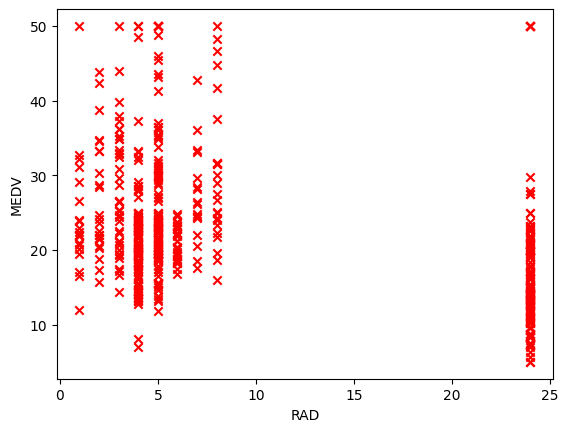

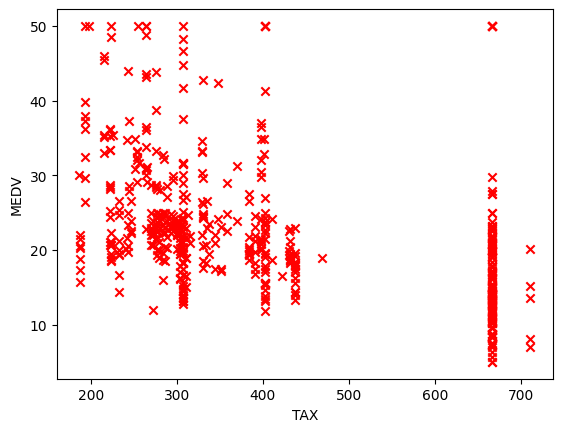

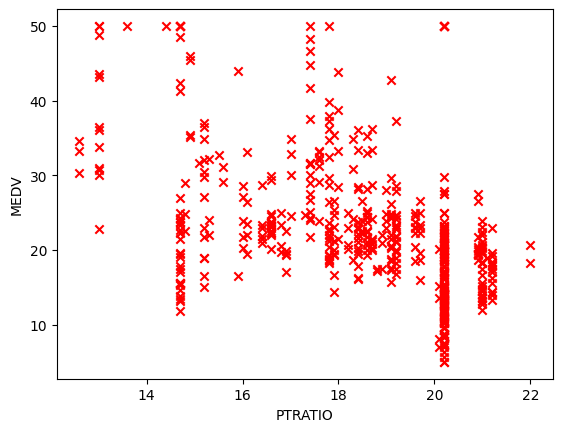

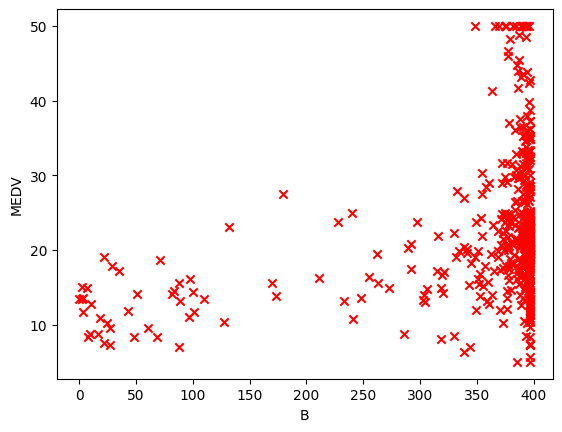

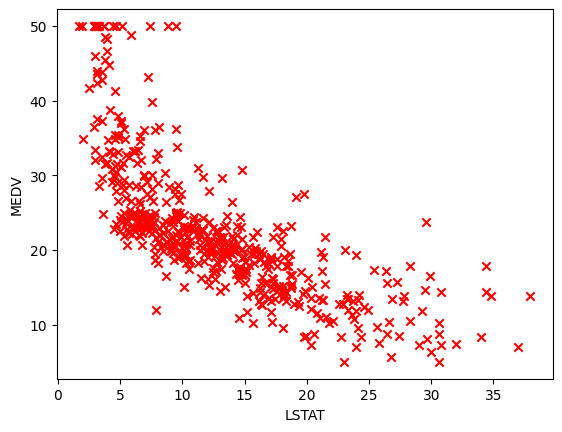

In [6]:
# Create scatter plots to visualize relationships of each feature with the target variable. For fun.
for col in X.columns:
    plt.scatter(X[col], y, marker='x', c='r')
    plt.xlabel(col)
    plt.ylabel(cols[-1])
    plt.show()

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

<Axes: >

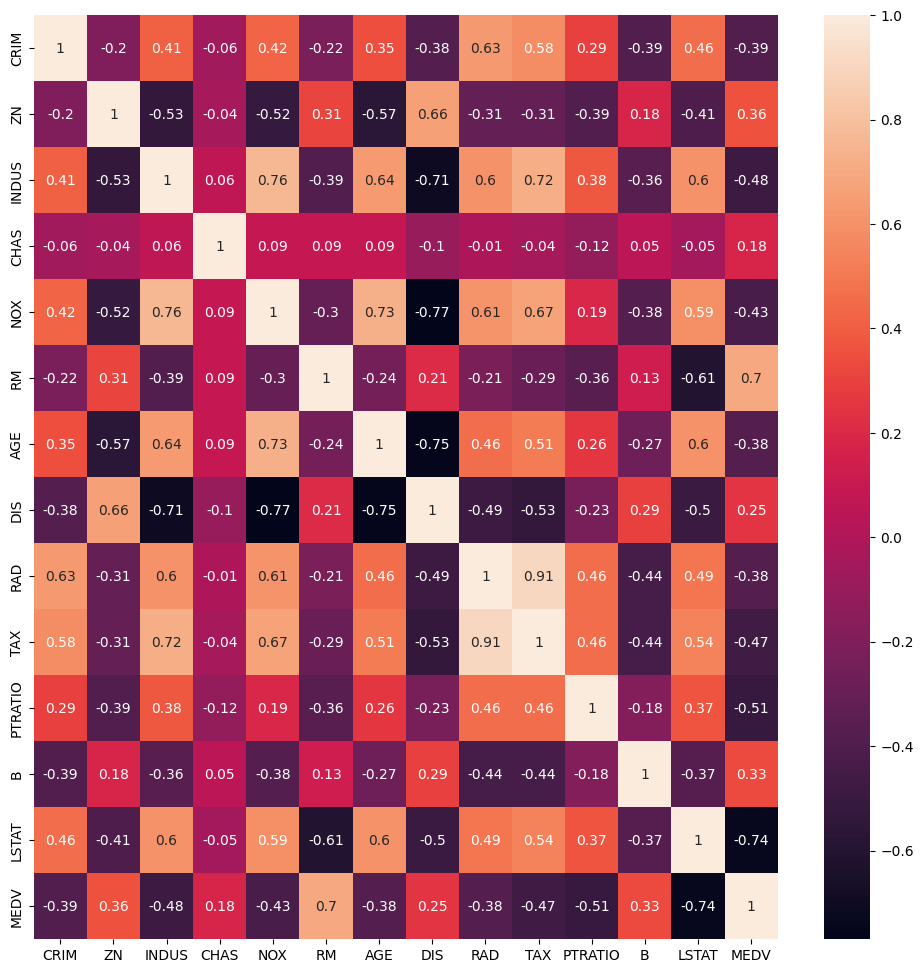

In [7]:
# Print the correlations between the features and create a heatmap for visualization
correlations = data.corr().round(2)
print(correlations)
fix, ax = plt.subplots(figsize=(12,12))
sb.heatmap(data=correlations, annot=True, ax=ax)

The heatmap tells us which variables have a high correlation. Whenever two variables highly correlate with each other, it is better to only include the other one of the two in the model.
If we assumed a treshold of 0.75, such pairs to consider could be 
- (INDUS, NOX): 0.76, 
- (NOX, DIS): -0.77, 
- (AGE, DIS): -0.75 and
- (RAD, TAX): 0.91.

Next thing to look at would be the p-values of the variables. If a variable has a p-value greater than 0.05, then that variable isn't significant enough to include in the model.

In [8]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
fit_est = est.fit()
print(fit_est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          6.72e-135
Time:                        23:28:45   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

From above summary we can see the following variables with p-value > 0.05
- INDUS 0.738
- AGE 0.958

These can be removed from the model. Now we are left with the correlating pairs
- (NOX, DIS): -0.77,
- (RAD, TAX): 0.91.

We can pick to remove NOX and TAX variables for example, leaving DIS and RAD to our model.

In [9]:
#Let's remove INDUS, AGE, NOX and TAX from the X and columns
cols_to_remove = ['INDUS', 'AGE', 'NOX', 'TAX']
new_X = X.drop(cols_to_remove, axis=1)
new_X.head()

,CRIM,ZN,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,0,6.575,4.0900,1,15.3,396.90,4.98
1,0.02731,0.0,0,6.421,4.9671,2,17.8,396.90,9.14
2,0.02729,0.0,0,7.185,4.9671,2,17.8,392.83,4.03
3,0.03237,0.0,0,6.998,6.0622,3,18.7,394.63,2.94
4,0.06905,0.0,0,7.147,6.0622,3,18.7,396.90,5.33


In [10]:
# Split data into training and testing sets with 70/30 partition, random state is for reproducibility
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3, random_state=42)

# Print the shapes of the sets
print('X_train: ', X_train.shape, 'X_test: ', X_test.shape, 
     'y_train: ', y_train.shape, 'y_test: ', y_test.shape)

X_train:  (354, 9) X_test:  (152, 9) y_train:  (354,) y_test:  (152,)


We are going to implement the fitting of the model by ourselves by creating a gradient descent method that takes X_train and y_train as well as initial weights and constant for the model. 

The method also needs a cost-function and gradient-function as well as alpha-value to determine the amount of descending per iteration and finally a limit-value for iterations.

For variables CRIM, ZN, CHAS, RM, DIS, RAD PTRATIO, B and LSTAT we will have weights w1, w2, ..., w9 in our model as well as constant B. Also let x1, x2, ..., x9 correspond to our variable names in that order. Our model would look something like this:

$f(\mathbf{x}^{(i)}) = w1x1^{(i)}+w2x2^{(i)}+...+w9x9^{(i)}+b$ where i refers to the row in data

To find the optimal model, we will have initial values for all the weights and the constant. Then using the cost function and gradient function, we will keep iterating towards lower and lower cost model with the value alpha deciding how big the steps are each iteration.

Start with writing the compute_cost method, that returns the total cost over all examples
$cost^{(i)} = (f(\mathbf{x})^{(i)}-y^{(i)})^2$

Additionally, the total sum of cost to be returned should equal to <br>
$J(\mathbf{w}, b)= \frac{1}{2m}\sum_{m-1}^{i=0}(f(\mathbf{x})^{(i)}-y^{(i)})^2$

This method isn't actually used in the model itself (We use the partial derivation of the cost function instead), but can be later used to graph how the cost function converges during gradient descent

In [41]:
def compute_cost(X, y, w, b):
    m = X.shape[0] # Rows of X training set
    total_cost = 0.0 # Total sum of all computed costs for all rows.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b # Using dot product for fast calculation
        total_cost += (f_wb_i-y[i])**2
    total_cost = total_cost/(2*m)
    return total_cost

Gradient descent's purpose is to take move to the lowest possible point of cost found within the dimensions of the features in the model. 

For this, the partial derivative of $\mathbf{w}$ and b are used with the size of step alpha, until $\mathbf{w}$ and b converge.

We can use the following formulas in computing gradient

$w_j = w_j-\alpha \frac{\partial}{\partial w_j}J(\mathbf{w}, b)$ for $j = 0..n-1$ and <br>
$b = b-\alpha \frac{\partial}{\partial b} J(\mathbf{w}, b)$

where n is the number of features in the model and the partial derivatives

$\frac{\partial}{\partial w_j} = \frac{1}{m}\sum_{i=0}^{m-1}(f(\mathbf{x})^{(i)}-y^{(i)})x_{j}^{(i)}$ and <br>
$\frac{\partial}{\partial \mathbf{b}} =\frac{1}{m}\sum_{i=0}^{m-1}(f(\mathbf{x})^{(i)}-y^{(i)})$

where m is the number of rows in data. 

With the two previous formulas, we can write compute_gradient function which returns the partial derivatives for $\mathbf{w}$ and b.

In [16]:
def compute_gradient(X, y, w, b):
    m,n = X.shape #m amount of data rows and n amount of features
    dj_dw = np.zeros((n,)) # Partial derivatives for weights w
    dj_db = 0. # Partial derivative for constant b
    
    for i in range(m): # For each row i in data
        err = (np.dot(X[i], w)+b)-y[i] # Difference between estimation and real value
        for j in range(n): # For each feature j in data.
            dj_dw[j] += err*X[i,j] #Sum of all rows i for weight j
        dj_db += err #Sum of all rows for constant b
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

In [20]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    w = copy.deepcopy(w_in) # This is to avoid modifying global w in function
    b = b_in
    cost_history = [] # Visualize the steps taken as cost gets smaller
    
    for i in range(num_iters): # For every step during gradient descent
        dj_dw, dj_db = gradient_function(X, y, w, b) # Get the partial derivatives of w and b
        w = w-alpha*dj_dw # Update every w_j to take the next step
        b = b-alpha*dj_db # Same for constant b
        if i < 10000:
            cost_history.append(cost_function(X, y, w, b)) #save cost J for graphing
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost_history[-1]:8.2f}   ")
    
    return w, b, cost_history # return final values and history of steps

In [63]:
# Initialize fitting parameters.
initial_w = np.zeros(X_train.shape[1]) #Initialize w1...w9 as 0
initial_b = 0.

# Numpy vectorization
np_X_train = X_train.to_numpy(dtype='float', na_value=np.nan)
np_y_train = y_train.to_numpy(dtype='float', na_value=np.nan)

# Initialize gradient descent settings
iterations = 5000
alpha = 0.00001 #If Alpha is too large, cost will not go down

w, b, cost_hist = gradient_descent(np_X_train, np_y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found:", w, b)

Iteration    0: Cost    79.95   
Iteration  500: Cost    36.27   
Iteration 1000: Cost    34.40   
Iteration 1500: Cost    32.93   
Iteration 2000: Cost    31.73   
Iteration 2500: Cost    30.74   
Iteration 3000: Cost    29.91   
Iteration 3500: Cost    29.21   
Iteration 4000: Cost    28.61   
Iteration 4500: Cost    28.09   
w,b found: [-0.12459372  0.073596    0.02268715  0.36066162 -0.00184287  0.14888264
  0.31408168  0.05173884 -0.48917842] 0.0341288428342012


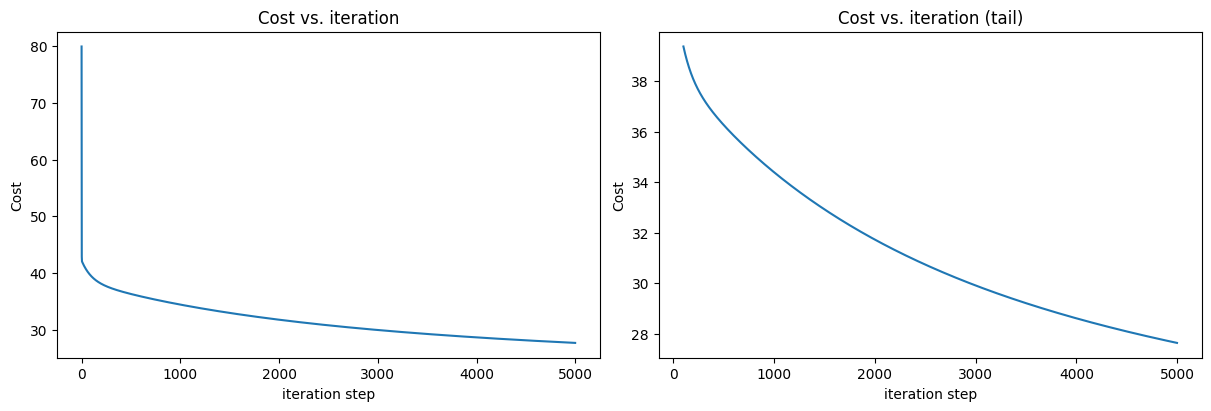

In [64]:
# plot cost versus iteration to visualize how the cost function converges
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(cost_hist)
ax2.plot(100 + np.arange(len(cost_hist[100:])), cost_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

We could now try to use the model and see how close the predictions for the first five rows of data come, using the same values and see how much the target value differs. Let's quickly display those values again.

In [96]:
display(new_X.head())
display(y.head())

,CRIM,ZN,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,0,6.575,4.0900,1,15.3,396.90,4.98
1,0.02731,0.0,0,6.421,4.9671,2,17.8,396.90,9.14
2,0.02729,0.0,0,7.185,4.9671,2,17.8,392.83,4.03
3,0.03237,0.0,0,6.998,6.0622,3,18.7,394.63,2.94
4,0.06905,0.0,0,7.147,6.0622,3,18.7,396.90,5.33


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

As a reminder, we deleted the variables INDUS, AGE, NOX and TAX so we pay no mind to those. Let's see how our model predicts the MEDV from these same values.

In [105]:
tests = new_X[:5].to_numpy(dtype='float', na_value=np.nan)
for i in range(5):
    prediction = np.dot(tests[i], w) + b
    real = y[i]
    print('prediction = ' + str(prediction) + ' actual value = ' + str(real))

prediction = 26.77525325148543 actual value = 24.0
prediction = 24.289856451958514 actual value = 21.6
prediction = 26.854529028222053 actual value = 34.7
prediction = 27.842324782357935 actual value = 33.4
prediction = 26.83980403042571 actual value = 36.2


Lastly, we can check the $R^2$ score for the model to have a better idea how good the model is

$R^2 = 1-\frac{\mathbf{SS}_{res}}{\mathbf{SS}_{tot}} 
= 1-\dfrac{\sum_{i=0}^{m-1}(\hat{y}_i-y_i)^2}{\sum_{i=0}^{m-1}(y_i-\bar{y})^2}$ where 

$\mathbf{SS}_{res}$ is sum of squares of residual errors and <br>
$\mathbf{SS}_{tot}$ is total sum of squares.

In [114]:
# Numpy vectorization
np_X_test = X_test.to_numpy(dtype='float', na_value=np.nan)
np_y_test = y_test.to_numpy(dtype='float', na_value=np.nan)
predictions = []
mu = np.mean(np_y_test) # Mean of y
ssr = 0.0
sst = 0.0

m= np_X_test.shape[0]
for i in range(m):
    prediction = np.dot(np_X_test[i], w) + b
    ssr += (prediction-np_y_test[i])**2
    sst += (np_y_test[i]-mu)**2
    predictions.append(prediction)
    
r2 = 1-(ssr/sst)
skr2 = r2_score(np_y_test, predictions) # This is used purely to assert the r2 is right
print(r2, skr2)

0.2601657161442209 0.26016571614422124
